In [12]:
import tensorflow as tf

# Percorso al tuo modello
model_path = 'modello78%.keras'  # Sostituisci con il percorso effettivo

# Carica il modello
model = tf.keras.models.load_model(model_path)

642/642 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step
Totale immagini testate: 20518
Totale predizioni corrette: 10546
Totale predizioni errate: 9972
Accuratezza complessiva: 51.40%

Dettaglio delle predizioni errate:
Vero: Neutral, Predetto: Happy - 136 volte
Vero: Neutral, Predetto: Anger - 35 volte
Vero: Neutral, Predetto: Surprise - 35 volte
Vero: Neutral, Predetto: Sad - 54 volte
Vero: Happy, Predetto: Neutral - 1253 volte
Vero: Happy, Predetto: Sad - 22 volte
Vero: Happy, Predetto: Anger - 10 volte
Vero: Happy, Predetto: Surprise - 21 volte
Vero: Surprise, Predetto: Neutral - 2425 volte
Vero: Surprise, Predetto: Happy - 462 volte
Vero: Surprise, Predetto: Sad - 31 volte
Vero: Surprise, Predetto: Anger - 41 volte
Vero: Sad, Predetto: Neutral - 2428 volte
Vero: Sad, Predetto: Happy - 207 volte
Vero: Sad, Predetto: Surprise - 31 volte
Vero: Sad, Predetto: Anger - 39 volte
Vero: Sad, Predetto: Fear - 2 volte
Vero: Anger, Predetto: Neutral - 2414 volte
Vero: Anger, Predetto: Happy - 173 volte
Ve

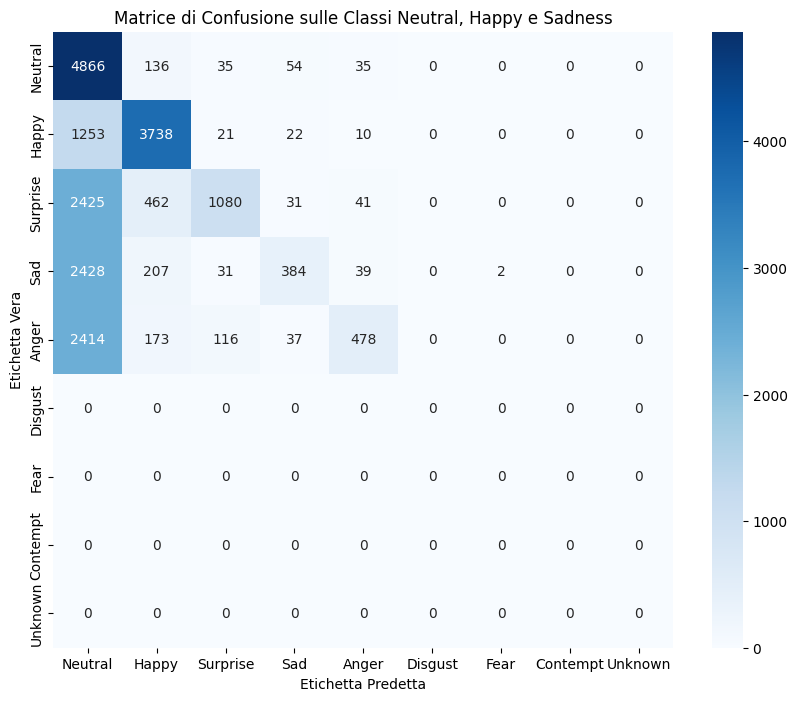

ValueError: Number of classes, 6, does not match size of target_names, 9. Try specifying the labels parameter

In [29]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definisci il percorso alla cartella delle immagini
test_dir = r'C:\Users\aless\Desktop\affectnet_converted'

# 2. Definisci le classi di interesse e tutte le classi del modello
classes_of_interest = ['Neutral', 'Happy', 'Surprise', 'Sad', 'Anger']
model_classes = ['Neutral', 'Happy', 'Surprise', 'Sad', 'Anger', 'Disgust', 'Fear', 'Contempt', 'Unknown']

# 3. Crea mappature tra indici e classi
model_class_to_index = {class_name: idx for idx, class_name in enumerate(model_classes)}
model_index_to_class = {idx: class_name for idx, class_name in enumerate(model_classes)}

interest_class_indices = [model_class_to_index[class_name] for class_name in classes_of_interest]

# 4. Carica le immagini e le etichette vere
image_paths = []
true_labels = []

for class_name in classes_of_interest:
    class_dir = os.path.join(test_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"La cartella {class_dir} non esiste. Verifica i nomi delle cartelle.")
        continue
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
        image_paths.append(img_path)
        true_labels.append(model_class_to_index[class_name])  # Etichetta come indice nel modello

# 5. Carica il modello
model_path = 'modello78%.keras'  # Sostituisci con il percorso effettivo
model = tf.keras.models.load_model(model_path)

# 6. Carica e preprocessa le immagini
images = []
for img_path in image_paths:
    img = Image.open(img_path)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array.astype('float32')
    # Se necessario, normalizza l'immagine (decommenta se il modello lo richiede)
    # img_array /= 255.0
    images.append(img_array)

images = np.array(images)
true_labels = np.array(true_labels)

# 7. Esegui le predizioni
predictions = model.predict(images)
predicted_indices = np.argmax(predictions, axis=1)

# 8. Analizza le predizioni
# Identifica dove il modello predice classi diverse da "Neutral", "Happy" o "Sadness"
incorrect_predictions = predicted_indices != true_labels

# Ottieni gli indici delle predizioni errate
incorrect_indices = np.where(incorrect_predictions)[0]

# Conta quante volte il modello ha predetto altre classi per ciascuna classe vera
from collections import Counter

# Conta le predizioni errate per ciascuna classe vera
errors_counter = Counter()

for idx in incorrect_indices:
    true_class = model_index_to_class[true_labels[idx]]
    predicted_class = model_index_to_class[predicted_indices[idx]]
    errors_counter[(true_class, predicted_class)] += 1

# 9. Stampa i risultati
total_images = len(true_labels)
total_errors = len(incorrect_indices)
accuracy = (total_images - total_errors) / total_images * 100

print(f"Totale immagini testate: {total_images}")
print(f"Totale predizioni corrette: {total_images - total_errors}")
print(f"Totale predizioni errate: {total_errors}")
print(f"Accuratezza complessiva: {accuracy:.2f}%\n")

print("Dettaglio delle predizioni errate:")
for (true_class, predicted_class), count in errors_counter.items():
    print(f"Vero: {true_class}, Predetto: {predicted_class} - {count} volte")

# 10. Matrice di confusione
# Crea una matrice di confusione includendo tutte le classi del modello
cm = confusion_matrix(true_labels, predicted_indices, labels=[model_class_to_index[c] for c in model_classes])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_classes, yticklabels=model_classes, cmap='Blues')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')
plt.title('Matrice di Confusione sulle Classi Neutral, Happy e Sadness')
plt.show()

# 11. Report di classificazione
report = classification_report(true_labels, predicted_indices, target_names=model_classes)
print(report)

# 12. Visualizza esempi di predizioni errate
import random

num_examples = 5  # Numero di esempi da mostrare
if total_errors > 0:
    example_indices = random.sample(list(incorrect_indices), min(num_examples, total_errors))
    for idx in example_indices:
        img = Image.open(image_paths[idx])
        true_class = model_index_to_class[true_labels[idx]]
        predicted_class = model_index_to_class[predicted_indices[idx]]
        plt.imshow(img, cmap='gray')
        plt.title(f"Vero: {true_class}, Predetto: {predicted_class}")
        plt.axis('off')
        plt.show()
else:
    print("Tutte le predizioni sono corrette.")
